In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%tensorflow_version 2.x

In [412]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/House Prices/data/train.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/House Prices/data/test.csv", index_col=0)

In [233]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#Deal with missing Values

In [391]:
df_train = df.copy()
data = [df_train, df_test]

In [235]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [364]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

In [392]:
def transform(df_input):
  df_input["LotFrontage"] = df_input.LotFrontage.fillna(df_train.LotFrontage.mean())
  df_input.drop(["Alley", "MoSold", "YrSold", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)
  df_input["MasVnrType"], df_input["MasVnrArea"] = df_input.MasVnrType.fillna("None"), df_input.MasVnrArea.fillna(0)
  df_input[['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df_input[['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("NA")
  df_input[["MasVnrType", "MasVnrArea"]] = df_input[["MasVnrType", "MasVnrArea"]].fillna("NA")
  df_input["FireplaceQu"] = df_input.FireplaceQu.fillna("NA")
  df_input.dropna(subset=["Electrical"], inplace=True)
  #df_input = df_input.fillna("NA")
  return df_input

In [393]:
df_train = transform(df_train)
#df_test = transform(df_test)

In [381]:
len(df_train.columns)

74

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [ ]:
df_train[df_train.BsmtQual.isnull()][['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "TotalBsmtSF"]].head()

In [ ]:
df_train.info()

In [382]:
df_train_filled = df_train.copy()

In [281]:
df_train_filled.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [328]:
label = df_train.SalePrice.copy()
#df_onehot = pd.DataFrame()
df_train_filled.drop("SalePrice", axis=1, inplace=True)

In [383]:
for col in df_train_filled.columns:
  if df_train[col].dtype == "O":
    df_train_filled = df_train_filled.join(pd.get_dummies(df_train_filled[col], prefix=col))
    df_train_filled = df_train_filled.drop(columns=col, axis=1)
df_train_filled.columns[:33]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

Id
1       706
2       978
3       486
4       216
5       655
       ... 
1456      0
1457    790
1458    275
1459     49
1460    830
Name: BsmtFinSF1, Length: 1459, dtype: int64

In [406]:
df_backup = df_test.copy()
for col in df_test.columns:
  if df_test[col].dtype == "O":
    print(col, len(df_test[col].value_counts().index))
    # df_test = df_test.join(pd.get_dummies(df_test[col], prefix=col))
    # df_test = df_test.drop(columns=col, axis=1)
df_test.columns[:33]

MSZoning 6
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
RoofStyle 6
RoofMatl 4
Exterior1st 14
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 670
BsmtFinType2 7
BsmtFinSF2 162
BsmtUnfSF 794
TotalBsmtSF 737
Heating 4
HeatingQC 5
CentralAir 2
Electrical 4
BsmtFullBath 5
BsmtHalfBath 4
KitchenQual 5
Functional 8
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 7
GarageArea 460
GarageQual 5
GarageCond 6
PavedDrive 3
SaleType 10
SaleCondition 6


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1'],
      dtype='object')

In [388]:
len(df_train_filled.columns)

381

In [331]:
df_train_filled.columns[:33]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [333]:
scaler = StandardScaler()

In [335]:
df_train_filled[df_train_filled.columns[:33]] = scaler.fit_transform(df_train_filled[df_train_filled.columns[:33]])

In [ ]:
#df_train_filled = scaler.transform(df_train_filled)

In [290]:
#df_train_filled = df_train_filled.join(df_onehot)

In [341]:
#@title Build, compile and fit the model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.Sequential([
                             Dense(128, "relu"),
                             #Dropout(0.1),
                             Dense(128, "relu"),
                             #Dropout(0.1),
                             Dense(64, "relu"),
                             #Dense(64, "relu"),
                             Dense(1, "relu")
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                 patience=5,
                                                                 restore_best_weights=True)]
                      )
  
  epochs = history.epoch
  
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return epochs, rmse, history.history   

In [ ]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show() 

In [336]:
df_train_filled["SalePrice"] = label

In [337]:
df_train_shuffled = df_train_filled.reindex(np.random.permutation(df_train_filled.index))

Epoch 1/50
12/12 [==============================] - 1s 27ms/step - loss: 19037726720.0000 - root_mean_squared_error: 137977.2656 - val_loss: 7451483136.0000 - val_root_mean_squared_error: 86321.9766
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 3758061568.0000 - root_mean_squared_error: 61303.0312 - val_loss: 1369735680.0000 - val_root_mean_squared_error: 37009.9414
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1686870400.0000 - root_mean_squared_error: 41071.5273 - val_loss: 748435072.0000 - val_root_mean_squared_error: 27357.5410
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 1142091392.0000 - root_mean_squared_error: 33794.8438 - val_loss: 901376128.0000 - val_root_mean_squared_error: 30022.9258
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 906370880.0000 - root_mean_squared_error: 30105.9941 - val_loss: 773659968.0000 - val_root_mean_squared_error: 27814.7441
Epoch 6/50
12/12 [===

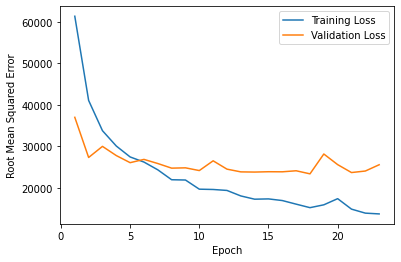

In [346]:
learning_rate = 0.08
epochs = 50
batch_size = 100
validation_split = 0.2

features = df_train_shuffled.columns[:-1]
label = "SalePrice"

model = tf.keras.Sequential([
                             Dense(256, "relu", kernel_regularizer="l1"),
                            #  Dense(256,"relu"),
                            #  Dropout(0.2),
                            #  Dense(256, "relu"),
                            #  Dropout(0.1),
                            #  Dense(128, "relu"),
                             Dense(64, "relu"),
                             Dense(1, "relu")
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss="mean_squared_error",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model = build_model(learning_rate)
epochs, rmse, history = train_model(model, df_train_shuffled, features, 
                                    label, epochs, batch_size
                                    ,validation_split
                                    )

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

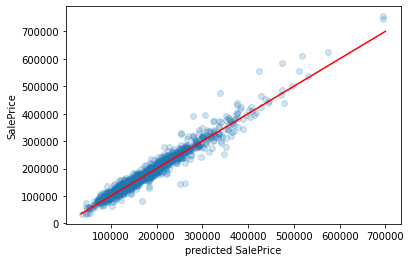

In [347]:
predicted = model.predict(df_train_filled[features])

plt.scatter(predicted, df_train_filled.SalePrice, alpha=0.2)
plt.xlabel("predicted SalePrice")
plt.ylabel("SalePrice")
plt.plot([35_000, 700_000], [35_000, 700_000], color = 'r')

In [349]:
model.save("/content/drive/MyDrive/Colab Notebooks/Kaggle/House Prices/tf_House_Price_Model2.h5")

In [358]:
test_prediction = model.predict(df_test[features])

KeyError: ignored